# Assignment 2 - Machine Learning Basics

## *Malvika Marathe*
Netid:  *mm742*

Github link: *https://github.com/mm95nov/Machine-Learning-Course/blob/master/Assignment%202.ipynb*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**


**(1)** A flexible method would preform better than an inflexible method because information can be taken from the large n. The large n also reduces the chances of overfitting.

**(2)** An inflexible method would be best. Since n is small, there is a greater risk of overfitting. If there are patterns detected, then it would be random. 

**(3)** You would want a flexible method since inflexible methods cannot "morph" to the shape of the data

**(4)** An inflexible method would be better because there is a smaller chance of overfitting the data. Since the variance is high, there will be a lot of random noise in the data. A flexible method will try and account for and fit that noise which is not what we want. 

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)** Since CEO salary is continuous, this is a regression problem. We would be interested in inference because we are trying to see what _factors_ affect the CEO salary. n = 500, since there are 500 firms, and p = 3 (profit, number of employees and industry)

**(b)** This is a classification problem because you are trying to "bin" products as a success or a failure. We would be interested in prediction because we want to _predict_ success or failure of the product. n = 20 (20 similar products previously launched) and p = 13 (price charged for the product, marketing budget, competition price, and the other ten).

**(c)** This is a regression problem because % change in the US dollar is a continuus number that depends on several factors. We would be interested in prediction because we are predicting the % change in the US dollar. n = 52 (weekly data over 2012) and p = 3 (% change in US, % change in British, % change in German).


# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?


**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

In [516]:
#import packages
import numpy as np
import pandas as pd
import time
from sklearn.neighbors import KNeighborsClassifier

# (a) Write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y
        pass
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        
        # Calculate the distance from each vector in x to the training data
      
        for i in range(x.shape[0]):
            temp = np.array(x.iloc[i,:])
            j=np.tile(temp,self.x.shape[0]).reshape((self.x.shape[0],self.x.shape[1]))
            squared = np.sum((j - np.array(self.x))**2,axis=1).reshape(-1,1)
            squared = squared.argsort(axis = 0)[:k]
            y_hat.append(self.y.iloc[squared.flatten(),0].mode()[0])
            
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [517]:
# (b) load the datasets to be used

# Low Dimension
x_train_low = pd.read_csv('data/A2_X_train_low.csv', header = None)
y_train_low = pd.read_csv('data/A2_y_train_low.csv', header = None)

x_test_low = pd.read_csv('data/A2_X_test_low.csv', header = None)
y_test_low = pd.read_csv('data/A2_y_test_low.csv', header = None)

# High Dimension
x_train_high = pd.read_csv('data/A2_X_train_high.csv', header = None)
y_train_high = pd.read_csv('data/A2_y_train_high.csv', header = None)

x_test_high = pd.read_csv('data/A2_X_test_high.csv', header = None)
y_test_high = pd.read_csv('data/A2_y_test_high.csv', header = None)

In [518]:
# (c) Evaluate the performance of your kNN classifier on a low- 
# and a high-dimensional dataset and time the predictions of each
# k = 5

# Low dimension Evaluation
start_time = time.time()
print("Low dimension classification")
classify_low = Knn()
classify_low.fit(x_train_low, y_train_low)
low_dim_classification = classify_low.predict(x_test_low, 5)
end_time = time.time()
low_dim_time = end_time-start_time
print("low dimension total time = ", low_dim_time)
print("low dimension accuracy = ", accuracy(y_test_low.values[:,0], low_dim_classification))

# High Dimension Evaluation
print("\n")
start_time = time.time()
print("High dimension classification")
classify_high = Knn()
classify_high.fit(x_train_high, y_train_high)
high_dim_classification = classify_high.predict(x_test_high, 5)
end_time = time.time()
high_dim_time = end_time-start_time
print("high dimension total time = ", high_dim_time)
print("high dimension accuracy = ", accuracy(y_test_high.values[:,0], high_dim_classification))

low dimension classification
low dimension total time =  0.9521160125732422
low dimension accuracy =  0.925


High dimension classification
high dimension total time =  1.6770062446594238
high dimension accuracy =  0.993


In [520]:
# (d) compare KNN classifier that was built to scikit classifier

# k = 5

# Low Dimension Evaluation
start_time = time.time()
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train_low, y_train_low.values.ravel())
l = neigh.predict(x_test_low)
end_time = time.time()
total_time = end_time-start_time
print("sklearn low dim total time = ", total_time)
print("sklearn low dim accuracy = ", accuracy(y_test_low.values[:,0], l))

print("\n")
# High Dimension Evaluation
start_time = time.time()
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train_high, y_train_high.values.ravel())
H = neigh.predict(x_test_high)
end_time = time.time()
total_time = end_time-start_time
print("sklearn high dim total time = ", total_time)
print("sklearn high dim accuracy = ", accuracy(y_test_high.values[:,0], H))

sklearn low dim total time =  0.007398128509521484
sklearn low dim accuracy =  0.925


sklearn high dim total time =  0.2148120403289795
sklearn high dim accuracy =  0.993


**ANSWER**:

**(d)** The KNeighborsClassifier is much faster than the KNN that I built. The packaged classifier has been highly optimized and therefore runs at speeds much greater than what was built from scratch

**(e)** Drawbacks ofthe prediction process, or testing the data, being slow is that debugging can be problematic. If it takes time for each prediction to run, and there is an error in the code, then finding the error, attempting to fix it and re-running the code can be time consuming. 

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [512]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['red','red','red','blue','blue','red'])

In [513]:
from scipy.spatial import distance

# (a) Compute Euclidian distances between x_test and each observation

x_test = np.array([[0, 0, 0]])

dst0 = distance.euclidean(x_test, X[0])
dst1 = distance.euclidean(x_test, X[1])
dst2 = distance.euclidean(x_test, X[2])
dst3 = distance.euclidean(x_test, X[3])
dst4 = distance.euclidean(x_test, X[4])
dst5 = distance.euclidean(x_test, X[5])
print(dst0, dst1, dst2, dst3, dst4, dst5)

3.0 2.0 3.1622776601683795 2.23606797749979 1.4142135623730951 1.7320508075688772


| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |Euclidian Distance from 𝑥1=𝑥2=𝑥3=0|
|------|-------|-------|-------|-------|------------------|
| **1**| 0     | 3     | 0     | Red   |3.0               |
| **2**| 2     | 0     | 0     | Red   |2.0               |
| **3**| 0     | 1     | 3     | Red   |3.1622776601683795|
| **4**| 0     | 1     | 2     | Blue  |2.23606797749979  |
| **5**| -1    | 0     | 1     | Blue  |1.4142135623730951|
| **6**| 1     | 1     | 1     | Red   |1.7320508075688772| 

In [514]:
from sklearn.neighbors import KNeighborsClassifier

# (b) Prediction with K = 1
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)
neigh.predict(x_test)

array(['blue'], dtype='<U4')

**(b)** With K = 1, the prediction for 𝑥1=𝑥2=𝑥3=0 is **blue**. This is because from the training dataset, the point that has the smallest calculated euclidian distance is observation number 5, which has a distance of 1.414. According to the training dataset, observation 5 is classified as blue. With K = 1, you find the single closest point, or the one point with the smallest euclidian distance and match the classification to it. Thus, 𝑥1=𝑥2=𝑥3=0 would also be blue.

In [515]:
# (c) Prediction with K = 3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
neigh.predict(x_test)

array(['red'], dtype='<U4')

**(c)** With K = 3, 𝑥1=𝑥2=𝑥3=0 is classfied as **red**. The 3 points in the training set that have the smallest euclidian distance are points 2, 5 and 6, classified as red, blue and red respectively. The majority classification is red. Therefore, 𝑥1=𝑥2=𝑥3=0 is also classified as red.

**(d)** A highly nonlinear Bayes boundary means that additional generalization would not be helpful since the variance is high. Therefore, a small K would risk overfitting, but a K value that is too large, would underfit, and just follow the data bias. 

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

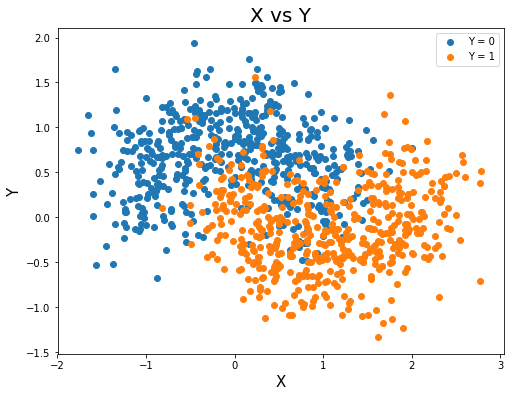

In [528]:
from sklearn.datasets import make_moons

# (a) Create synthetic dataset
X, Y = make_moons(n_samples=1000, noise = 0.35)

# (b) Scatterplot of random samples
plt.figure(figsize=(8,6))
plt.scatter(X[Y==0,0], X[Y==0,1], label = "Y = 0")
plt.scatter(X[Y==1,0], X[Y==1,1], label = "Y = 1")
plt.xlabel("X", size = 15)
plt.ylabel("Y", size = 15)
plt.title("X vs Y", size = 20)
plt.legend()

In [554]:
# (c) Create 3 different subsets

a = np.arange(1000)
b = np.random.permutation(a)

# subset 1
x_train_1 = X[b[:100], :] 
y_train_1 = Y[b[:100]]

neigh1_1 = KNeighborsClassifier(n_neighbors = 1)
neigh1_25 = KNeighborsClassifier(n_neighbors = 25)
neigh1_50 = KNeighborsClassifier(n_neighbors = 50)

# subset 2
x_train_2 = X[b[100:200], :] 
y_train_2 = Y[b[100:200]]

neigh2_1 = KNeighborsClassifier(n_neighbors = 1)
neigh2_25 = KNeighborsClassifier(n_neighbors = 25)
neigh2_50 = KNeighborsClassifier(n_neighbors = 50)

# subset 3
x_train_3 = X[b[200:300], :] 
y_train_3 = Y[b[200:300]]

neigh3_1 = KNeighborsClassifier(n_neighbors = 1)
neigh3_25 = KNeighborsClassifier(n_neighbors = 25)
neigh3_50 = KNeighborsClassifier(n_neighbors = 50)

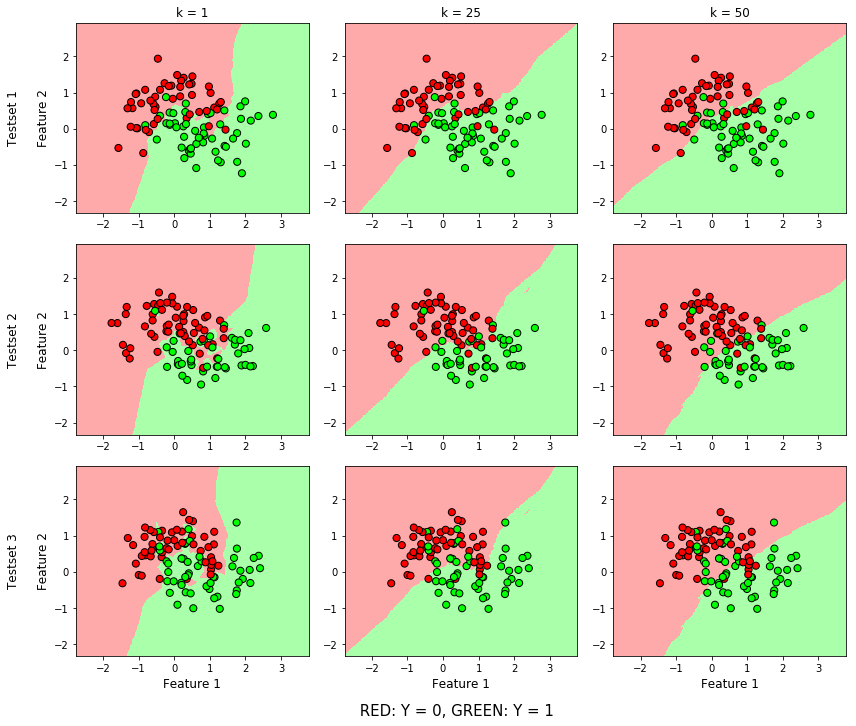

In [555]:
# (d) Plot the decision boundary

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Initial graph set-up

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

######################################## Dataset 1

######################################## Dataset 1, k = 1
neigh1_1 = KNeighborsClassifier(n_neighbors = 1)
neigh1_1.fit(x_train_1, y_train_1)

Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
    
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(12,10))
plt.subplot(3,3, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(x_train_1[:,0], x_train_1[:,1], c=y_train_1, cmap=cmap_bold,
                edgecolor='k', s=50)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k = 1")
plt.ylabel("Testset 1"
          "\n"
           "\n"
          "Feature 2", size = 12)

######################################## Dataset 1, k = 25
neigh1_25 = KNeighborsClassifier(n_neighbors = 25)
neigh1_25.fit(x_train_1, y_train_1)


Z = neigh1_25.predict(np.c_[xx.ravel(), yy.ravel()])
    
Z = Z.reshape(xx.shape)
plt.subplot(3,3, 2)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(x_train_1[:,0], x_train_1[:,1], c=y_train_1, cmap=cmap_bold,
                edgecolor='k', s=50)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k = 25")

######################################## Dataset 1, k = 50
neigh1_50 = KNeighborsClassifier(n_neighbors = 50)
neigh1_50.fit(x_train_1, y_train_1)

Z = neigh1_50.predict(np.c_[xx.ravel(), yy.ravel()])
    
Z = Z.reshape(xx.shape)
plt.subplot(3,3, 3)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points

plt.scatter(x_train_1[:,0], x_train_1[:,1], c=y_train_1, cmap=cmap_bold,
                edgecolor='k', s=50)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k = 50")

######################################## Dataset 2
######################################## Dataset 2, k = 1
neigh2_1 = KNeighborsClassifier(n_neighbors = 1)
neigh2_1.fit(x_train_2, y_train_2)

Z = neigh2_1.predict(np.c_[xx.ravel(), yy.ravel()])
    
Z = Z.reshape(xx.shape)
plt.subplot(3,3, 4)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points

plt.scatter(x_train_2[:,0], x_train_2[:,1], c=y_train_2, cmap=cmap_bold,
                edgecolor='k', s=50)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.ylabel("Testset 2"
          "\n"
           "\n"
          "Feature 2", size = 12)

######################################## Dataset 2, k = 25
neigh2_25 = KNeighborsClassifier(n_neighbors = 25)
neigh2_25.fit(x_train_2, y_train_2)

Z = neigh2_25.predict(np.c_[xx.ravel(), yy.ravel()])
    
Z = Z.reshape(xx.shape)
plt.subplot(3,3, 5)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points

plt.scatter(x_train_2[:,0], x_train_2[:,1], c=y_train_2, cmap=cmap_bold,
                edgecolor='k', s=50)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

######################################## Dataset 2, k = 50
neigh2_50 = KNeighborsClassifier(n_neighbors = 50)
neigh2_50.fit(x_train_2, y_train_2)

Z = neigh2_50.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.subplot(3,3, 6)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points

plt.scatter(x_train_2[:,0], x_train_2[:,1], c=y_train_2, cmap=cmap_bold,
                edgecolor='k', s=50)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

######################################## Dataset 3
######################################## Dataset 3, k = 1
neigh3_1 = KNeighborsClassifier(n_neighbors = 1)
neigh3_1.fit(x_train_3, y_train_3)

Z = neigh3_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.subplot(3,3, 7)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points

plt.scatter(x_train_3[:,0], x_train_3[:,1], c=y_train_3, cmap=cmap_bold,
                edgecolor='k', s=50)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Feature 1", size = 12)
plt.ylabel("Testset 3"
          "\n"
           "\n"
          "Feature 2", size = 12)

######################################## Dataset 3, k = 25
neigh3_25 = KNeighborsClassifier(n_neighbors = 25)
neigh3_25.fit(x_train_3, y_train_3)

Z = neigh2_25.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.subplot(3,3, 8)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points

plt.scatter(x_train_3[:,0], x_train_3[:,1], c=y_train_3, cmap=cmap_bold,
                edgecolor='k', s=50)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Feature 1"
          "\n", size = 12)

######################################## Dataset 3, k = 50
neigh3_50 = KNeighborsClassifier(n_neighbors = 50)
neigh3_50.fit(x_train_3, y_train_2)

Z = neigh2_50.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.subplot(3,3, 9)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points

plt.scatter(x_train_3[:,0], x_train_3[:,1], c=y_train_3, cmap=cmap_bold,
                edgecolor='k', s=50)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Feature 1", size = 12)

# Plot formatting
fig.text(.53, .0001, '\n \n RED: Y = 0, GREEN: Y = 1', ha='center', size = 15)
plt.tight_layout()

**(e)**
The K=1 decision boundary seperates the two classes the best, for all three datasets. However, K = 1 is too small and therefore the model is overfitting the data. As the value of K increases, moving from column 1 to column 2 to column 3, you can see the decision boundary becoming more linear, and classifying the points less accurately. 
The difference between rows is simply a different subset of data. All test sets seem to have a yin/yang like shape but Testset 3 has the strongest "hook", which is harder to classify without a low K value.
As the data changes from each test set, the K=1 column has the most variance while the K = 50 has the least variance. The K=50 has approximately the same decision boundary across testsets. This is because it is the least flexible. 

**(f)** As you increase the value of K, the decision boundary becomes less and less flexible and therefore leads to a higher number of misclassified points. However, a low K value (K = 1) is technically overfitting and has a low bias. As K increases, the variance decreases and the bias increases. Or, as the value of k decreases, the variance increases and the bias decreases. It is important to choose a K that has a low misclassification rate but also is not overfitting the data. 

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

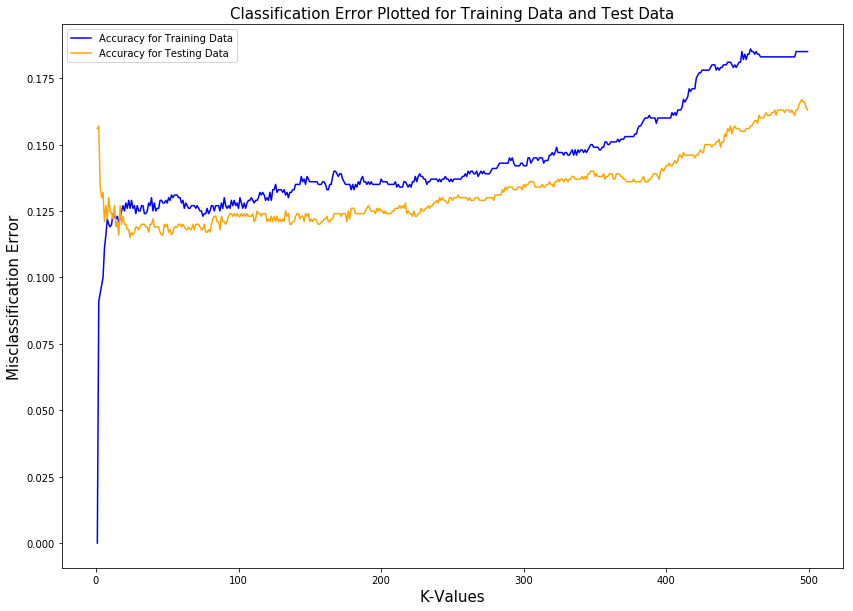

In [558]:
import sklearn
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

#a
#Make moons dataset
test_x, test_y = make_moons(n_samples=1000, noise=.35, random_state=2)

# x, y in dataframe, label class values
test_DF = pd.DataFrame(dict(x=test_x[:,0],
                          y=test_x[:,1],
                          label=test_y))
test_DF.columns = ['test_x_1','test_x_2','test_class']

#Training Set
makemoonsX, makemoonsY = make_moons(n_samples=1000, noise=.35, random_state=1)

# x, y in dataframe, label class values
makemoonsDF = pd.DataFrame(dict(x=makemoonsX[:,0],
                        y=makemoonsX[:,1],
                        label=makemoonsY))
makemoonsDF.columns = ['training_x_1','training_x_2','training_class']

#b
#Find classification error

values_k=range(1,500)
MissClassError_train_scores=[]
MissClassError_test_scores=[]

#KNN classifier object
KNN=KNeighborsClassifier()

#Loop through values of k 1:500
for k in values_k:
   KNN.n_neighbors=k
   KNN.fit(makemoonsDF[['training_x_1', 'training_x_2']], makemoonsDF['training_class'])
   train_score=KNN.score(makemoonsDF[['training_x_1', 'training_x_2']], makemoonsDF['training_class'])
   MCEtrain_score = 1- train_score
   test_score=KNN.score(test_DF[['test_x_1', 'test_x_2']], test_DF['test_class'])
   MCEtest_score = 1- test_score
   MissClassError_train_scores.append(MCEtrain_score)
   MissClassError_test_scores.append(MCEtest_score)

# Plot k values and classification error for training and test data
plt.figure(figsize=(14, 10))
plt.plot(values_k,MissClassError_train_scores, color='blue',label='Accuracy for Training Data')
plt.plot(values_k,MissClassError_test_scores, color='orange',label='Accuracy for Testing Data')
plt.legend()
plt.xlabel('K-Values', size = 15)
plt.ylabel('Misclassification Error', size = 15)
plt.title("Classification Error Plotted for Training Data and Test Data", size = 15)
plt.show()

**(c)** What trend do you see in the results?

For the training dataset, as the value of k increases, the misclassification error increases. For k-values between 2 and 5, the misclassificaiton error seems to be a little less than .10. However, after k increases past 5, the MSE continues to grow past 0.10 as well. The lower the value of K, the more flexible the model is. However, if k is too low, then you risk overfitting which is why the MSE is so low for K = 1.

So generally speaking, for the test dataset, as the K-values increase, the MSE decreases. 

**(d)** 
A low k represents a high variance and low bias. While a large k represents a low variance and high bias.

**(e)** 
The optimal value of k is approximately 15 with respect to this dataset. According to the graph, this creates the optimal variance and optimal bias.

**(f)** 
It depends on the model you use. For example, if you are using a random forest model, then the way to add more flexibility would be to add more trees. On the other hand, if you are doing a neural net, then you would add more layers. 

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [565]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

Text(0.5, 1.0, 'Training Data')

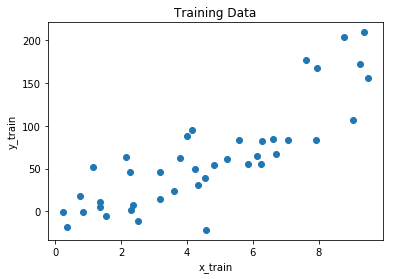

In [566]:
# (a) scatter plot
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, 'o')
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.title("Training Data")

In [582]:
#b
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


#fit the model
reg = LinearRegression().fit(x_train, y_train)

# R-squared, MSE, coefficients, intercepts, model equation
r_squared = reg.score(X = x_train, y = y_train)
print("R squared= ", r_squared)

MSE = mean_squared_error(y_pred = reg.predict(x_train), y_true = y_train)
print("MSE = ", MSE)

print("coefficient = ", reg.coef_[0])
print("intercept = ", reg.intercept_[0])

print("Model equation: y = %f + %fx" %(reg.intercept_[0], reg.coef_[0]))

R squared=  0.7014590913812251
MSE =  1052.5853662498014
coefficient =  [18.30320685]
intercept =  -21.73078292905422
Model equation: y = -21.730783 + 18.303207x


In [588]:
# (c) Model transformation -- log transformed
import math
log_x_train = [math.log(x) for x in x_train]
log_x_test = [math.log(x) for x in x_test]
log_X_train = np.c_[np.array(x_train),np.array(log_x_train)]
log_X_test = np.c_[np.array(x_test),np.array(log_x_test)]

#fit the model
reg_log = LinearRegression().fit(log_X_train,y_train)

r_squared_log_reg = reg_log.score(X = log_X_train, y = y_train)
print("R-squared for log transformed data = ", r_squared_log_reg)

MSE_log = mean_squared_error(y_pred= reg_log.predict(log_X_train), y_true = y_train)
print("MSE for log transformed data = ", MSE_log)

print("coefficient for log transformed = ", reg_log.coef_[0])
print("intercept = ", reg_log.intercept_[0])

print("log transformed model equation: y = %f + %fx + %flog(x)" 
      %(reg_log.intercept_[0], reg_log.coef_[0][1], reg_log.coef_[0][1]))

R-squared for log transformed data =  0.7219455369854199
MSE for log transformed data =  980.3549541792602
coefficient for log transformed =  [ 25.08280536 -23.33063096]
intercept =  -23.680150129907396
log transformed model equation: y = -23.680150 + -23.330631x + -23.330631log(x)


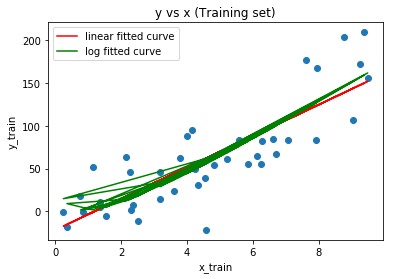

In [471]:
# (d) Plot original data with linear curve and log curve

plt.plot(x_train, y_train, 'o')
plt.plot(x_train, reg.predict(x_train), color = 'red', label = "linear fitted curve")
plt.plot(x_train, reg_log.predict(log_X_train), color = 'green', label = "log fitted curve")
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.title('y vs x (Training set)')
plt.legend()

plt.show()

In [590]:
# (e) Apply each model to test data

reg = LinearRegression().fit(x_train, y_train)
r_squared_test = reg.score(X = x_test, y = y_test)
print("R squared test data = ", r_squared_test)
MSE_test= mean_squared_error(y_pred= reg.predict(x_test), y_true = y_test)
print("MSE test data = ", MSE_test)

print("\n")
reg_log = LinearRegression().fit(log_X_train,y_train)
r_squared_log_reg_test = reg_log.score(X = log_X_test, y = y_test)
print("R squared for log transformed test data = ", r_squared_log_reg_test)
MSE_log_test = mean_squared_error(y_pred= reg_log.predict(log_X_test), y_true = y_test)
print("MSE log transformed test data = ", MSE_log_test)

R squared test data =  0.5556465885794163
MSE test data =  2023.3121088887128


R squared for log transformed test data =  0.6318499871688507
MSE log transformed test data =  1676.3287052696057


**(f) Which models perform better on the training data, and which on the test data? Why?**

**Training Data**

**R-squared training data = 0.7014590913812251**

**MSE training data = 1052.5853662498014**

**R-squared training data log transformed = 0.7219455369854199**

**MSE training data log transformed = 980.3549541792602**

With the training data, the log transformed model performs better than the non-transformed model. The r-squared value for the log transformed data is slightly higher and the MSE is lower. A higher r-squared indicates a better fit to the regression line. MSE indicates the difference between the estimated values and the true values. Therefore, the lower the MSE the better, within reason. An MSE that is too low could be an indication of overfitting. 

**Test Data**

**R-squared test data = 0.5556465885794163**

**MSE test data = 2023.3121088887128**

**R-squared test data log transformed = 0.6318499871688507**

**MSE test data log transformed = 1676.3287052696057**

For the test data, the log transformed data still performed better. The r-squared is higher and the MSE is lower. 

The reason that the log tranformed data performed better on both the training and test data is because, if you look at the shape of the data, both test and train, you can see that there is a slight hook in the points, and a slight gaterhing of points towards the right side. When you take the log of the x values, you are emphasizing the gap between smaller values of x and de-emphasizing the gap between larger values of x. This reduces the effect of the fanning allowing for a better fit of the model to the data. 

**(g) Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?**

If the test data were significantly different than the training dataset, then the model made using the training data would not fit the test data very well. It is important to use training and test data that is similar enough so that the training data can accurately fit the test data. The overall predictive capability would be quite poor if the test data is very different than the training data. 